In [98]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pathlib import Path

# Impor the OpenWeatherMap API key
#from api_keys import api_keys

In [99]:
dataset2018= Path('.','Data','ambulance2018.csv')
dataset2019= Path('.','Data','ambulance2019.csv')
dataset= pd.read_csv(dataset2018)
dataset2=pd.read_csv(dataset2019)

# Statistical Analysis of Ambulance dataset in 2018

In [100]:
# Function to summarize data for a given dataset
def summarize_data(data):
    # Convert relevant columns to numeric
    data['AVG RT - Seconds'] = pd.to_numeric(data['AVG RT - Seconds'], errors='coerce')
    data['Total Number'] = pd.to_numeric(data['Total Number'], errors='coerce')

    # Calculate summary statistics
    total_areas = data['UCL Name'].nunique()
    total_codes = data['Final Dispatch Code'].nunique()
    avg_response_time = data['AVG RT - Seconds'].mean()
    avg_calls = data['Total Number'].mean()

    return total_areas, total_codes, avg_response_time, avg_calls

In [101]:
dataset.head()

,UCL Name,Final Dispatch Code,%<=15mins,AVG RT - Seconds,Total Number
0,Albury - Wodonga (Wodonga Part),Code 1,91.35%,602,1735
1,Bacchus Marsh,Code 1,79.85%,693,784
2,Bairnsdale,Code 1,85.61%,668,966
3,Ballarat,Code 1,89.32%,627,5272
4,Benalla,Code 1,84.08%,682,534


In [102]:
total_areas = dataset2['UCL Name'].nunique()
total_codes= dataset2['Final Dispatch Code'].nunique()
dataset['AVG RT - Seconds'] = pd.to_numeric(dataset['AVG RT - Seconds'], errors='coerce')
dataset['Total Number']=pd.to_numeric(dataset['Total Number'], errors='coerce')

print(f"Total unique areas in 2018 : {total_areas2}")
print(f"Total code types 2018: {total_codes2}")
print("Average response time across all areas in 2018: {:.2f} seconds".format(dataset['AVG RT - Seconds'].mean()))
print("Average number of calls in 2018: {:.2f} calls".format(dataset['Total Number'].mean()))

Total unique areas in 2018 : 43
Total code types 2018: 5
Average response time across all areas in 2018: 1035.77 seconds
Average number of calls in 2018: 11240.08 calls


In [103]:
summary_2018 = summarize_data(dataset)
summary_2018

(38, 3, 1035.7702702702702, 11240.081081081082)

In [104]:
summary_stats = dataset.describe()
summary_stats

,AVG RT - Seconds,Total Number
count,74.000000,74.000000
mean,1035.770270,11240.081081
std,410.075922,42355.017419
min,543.000000,294.000000
25%,657.500000,531.000000
50%,1009.500000,896.500000
75%,1411.750000,1700.750000
max,1907.000000,236171.000000


# Statistical Analysis of Ambulance dataset in 2019

In [105]:
dataset2.head()

,UCL Name,Final Dispatch Code,%<=15mins,AVG RT - Seconds,Total Number
0,Albury - Wodonga (Wodonga Part),Code 1,90.9%,604,"2,050"
1,Bacchus Marsh,Code 1,83.4%,643,835
2,Bairnsdale,Code 1,84.1%,654,"1,021"
3,Ballarat,Code 1,91.2%,604,"5,785"
4,Benalla,Code 1,76.4%,752,592


In [106]:
summary_2019 = summarize_data(dataset2)
summary_2019

(43, 5, 1010.9615384615385, 614.8510638297872)

In [107]:
total_areas2 = dataset2['UCL Name'].nunique()
total_codes2= dataset2['Final Dispatch Code'].nunique()
dataset2['AVG RT - Seconds'] = pd.to_numeric(dataset2['AVG RT - Seconds'], errors='coerce')
dataset2['Total Number']=pd.to_numeric(dataset2['Total Number'], errors='coerce')

print(f"Total unique areas in 2019 : {total_areas2}")
print(f"Total code types 2019: {total_codes2}")
print("Average response time across all areas in 2019: {:.2f} seconds".format(dataset2['AVG RT - Seconds'].mean()))
print("Average number of calls in 2019: {:.2f} calls".format(dataset2['Total Number'].mean()))

Total unique areas in 2019 : 43
Total code types 2019: 5
Average response time across all areas in 2019: 1010.96 seconds
Average number of calls in 2019: 614.85 calls


In [108]:
summary_stats2 = dataset2.describe()
summary_stats

,AVG RT - Seconds,Total Number
count,74.000000,74.000000
mean,1035.770270,11240.081081
std,410.075922,42355.017419
min,543.000000,294.000000
25%,657.500000,531.000000
50%,1009.500000,896.500000
75%,1411.750000,1700.750000
max,1907.000000,236171.000000


# Data analysis- 2018 vs 2019

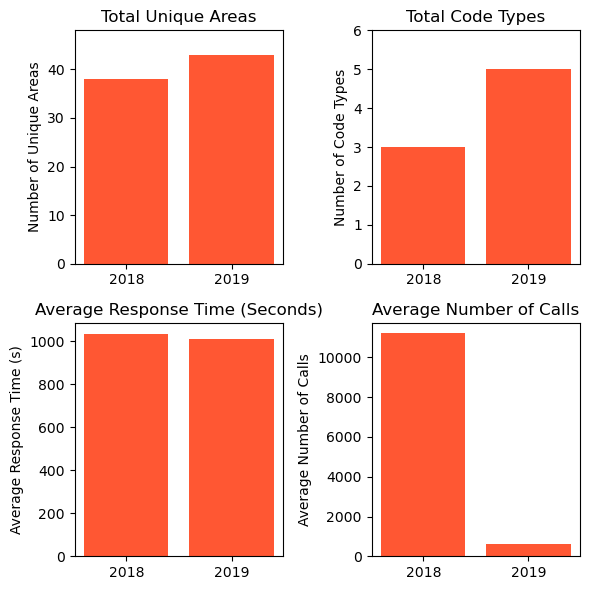

In [109]:
# Prepare data for plotting
years = ['2018', '2019']
unique_areas = [summary_2018[0], summary_2019[0]]
total_code_types = [summary_2018[1], summary_2019[1]]
avg_response_time = [summary_2018[2], summary_2019[2]]
avg_calls = [summary_2018[3], summary_2019[3]]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(6, 6))

# Plot total unique areas
axs[0, 0].bar(years, unique_areas, color='#FF5733')
axs[0, 0].set_title('Total Unique Areas')
axs[0, 0].set_ylabel('Number of Unique Areas')
axs[0, 0].set_ylim(0, max(unique_areas) + 5)

# Plot total code types
axs[0, 1].bar(years, total_code_types, color='#FF5733')
axs[0, 1].set_title('Total Code Types')
axs[0, 1].set_ylabel('Number of Code Types')
axs[0, 1].set_ylim(0, max(total_code_types) + 1)

# Plot average response time
axs[1, 0].bar(years, avg_response_time, color='#FF5733')
axs[1, 0].set_title('Average Response Time (Seconds)')
axs[1, 0].set_ylabel('Average Response Time (s)')
axs[1, 0].set_ylim(0, max(avg_response_time) + 50)

# Plot average number of calls
axs[1, 1].bar(years, avg_calls, color='#FF5733')
axs[1, 1].set_title('Average Number of Calls')
axs[1, 1].set_ylabel('Average Number of Calls')
axs[1, 1].set_ylim(0, max(avg_calls) + 500)

# Adjust layout
plt.tight_layout()
plt.show()

# Observations
The key observations of the data above are:

#### Increase in Unique Areas:
The growth in the number of unique areas served indicates an expansion of service coverage, which may reflect population growth or an effort to improve accessibility.

#### Decrease in Average Number of Calls:
The significant reduction in the average number of calls per area could suggest that improvements in lifestyle, awareness, or preventive healthcare measures are leading to fewer emergency calls.
It may also indicate more effective management strategies, resulting in reduced demand for services.

#### Increase in Code Types:
The rise in the number of codes suggests a diversification in the types of services provided, allowing for more specialized responses to various situations.
This could improve the efficiency of call management, as dispatchers can allocate resources more effectively based on the nature of each call.

#### Consistency in Average Response Time:
The stable average response time across both years suggests that despite changes in demand and coverage, the quality of service has been maintained.
This consistency may be attributed to better operational practices or resource management, ensuring that response times remain effective even with increased complexity.

# Code1 vs Code2 Response time in 2018

In [110]:
# Filter for 'Code 1'
Code1_rt = dataset[dataset['Final Dispatch Code'] == 'Code 1']
count_Code1 = Code1_rt.shape[0]  # Count of 'Code 1'
min_rt_Code1 = Code1_rt['AVG RT - Seconds'].min()  # Min RT for 'Code 1'
max_rt_Code1 = Code1_rt['AVG RT - Seconds'].max()  # Max RT for 'Code 1'

# Filter for 'Code 2'
Code2_rt = dataset[dataset['Final Dispatch Code'] == 'Code 2']
count_Code2 = Code2_rt.shape[0]  # Count of 'Code 2'
min_rt_Code2 = Code2_rt['AVG RT - Seconds'].min()  # Min RT for 'Code 2'
max_rt_Code2 = Code2_rt['AVG RT - Seconds'].max()  # Max RT for 'Code 2'

# Print the results
print(f"Count of 'Code 1': {count_Code1}")
print(f"Minimum Response Time for 'Code 1': {min_rt_Code1} seconds")
print(f"Maximum Response Time for 'Code 1': {max_rt_Code1} seconds")
print(f"Count of 'Code 2': {count_Code2}")
print(f"Minimum Response Time for 'Code 2': {min_rt_Code2} seconds")
print(f"Maximum Response Time for 'Code 2': {max_rt_Code2} seconds")

Count of 'Code 1': 37
Minimum Response Time for 'Code 1': 543.0 seconds
Maximum Response Time for 'Code 1': 890.0 seconds
Count of 'Code 2': 37
Minimum Response Time for 'Code 2': 1129.0 seconds
Maximum Response Time for 'Code 2': 1907.0 seconds


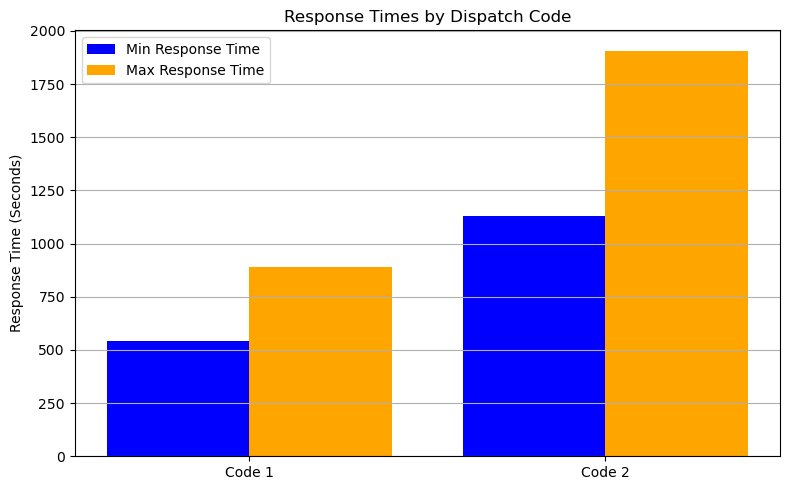

In [111]:
# Visualization for Response Times
labels = ['Code 1', 'Code 2']
min_response_times = [min_rt_Code1, min_rt_Code2]
max_response_times = [max_rt_Code1, max_rt_Code2]

# Create subplots for response times
x = range(len(labels))  # Position for the bars

# Bar chart for response times
plt.figure(figsize=(8, 5))
plt.bar(x, min_response_times, width=0.4, label='Min Response Time', color='blue', align='center')
plt.bar([p + 0.4 for p in x], max_response_times, width=0.4, label='Max Response Time', color='orange', align='center')

# Customize the plot
plt.title('Response Times by Dispatch Code')
plt.ylabel('Response Time (Seconds)')
plt.xticks([p + 0.2 for p in x], labels)
plt.legend()
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()

# Linear Regression

 The R-squared value is : 0.0015484609189544505


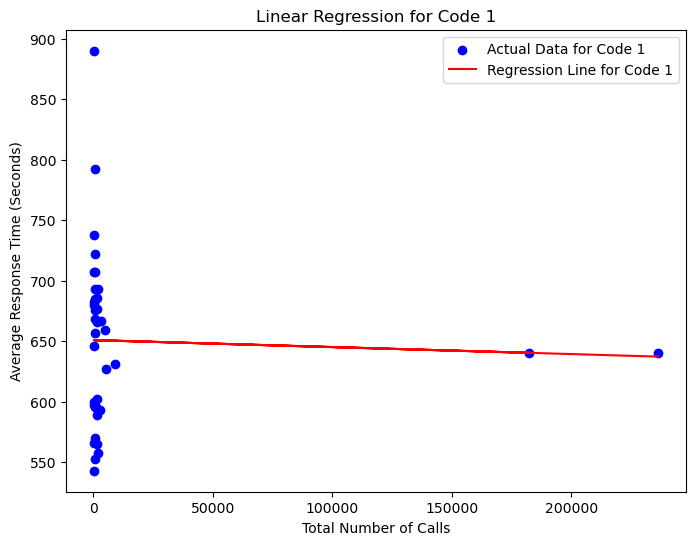

In [116]:
# Prepare data for linear regression
X_Code1 = Code1_rt['Total Number']  # Independent variable (Total Number of Calls)
Y_Code1 = Code1_rt['AVG RT - Seconds']  # Dependent variable (Average Response Time)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(X_Code1, Y_Code1)

# Print regression results
print(f" The R-squared value is : {r_value**2}")

# Predict using the regression line
predicted_Y_Code1 = intercept + slope * X_Code1

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X_Code1, Y_Code1, color='blue', label='Actual Data for Code 1')
plt.plot(X_Code1, predicted_Y_Code1, color='red', label='Regression Line for Code 1')
plt.title('Linear Regression for Code 1')
plt.xlabel('Total Number of Calls')
plt.ylabel('Average Response Time (Seconds)')
plt.legend()
plt.show()

The R-squared value is : 0.021327416171593772


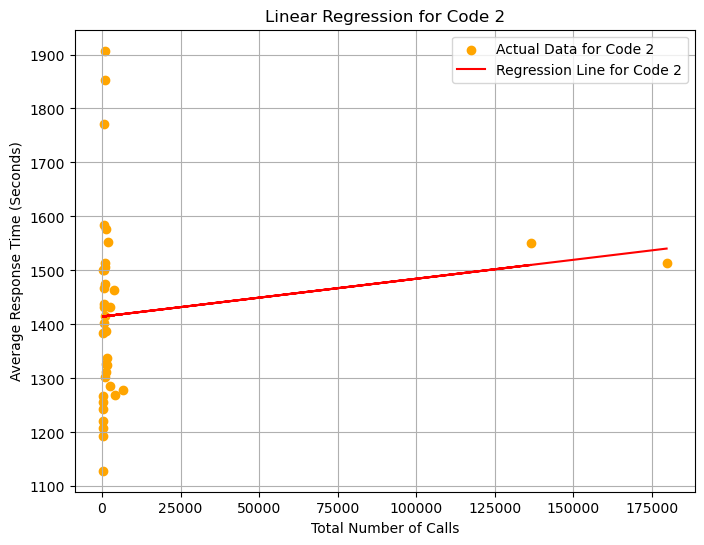

In [119]:
# Prepare data for linear regression
X_Code2 = Code2_rt['Total Number']  # Independent variable (Total Number of Calls)
Y_Code2 = Code2_rt['AVG RT - Seconds']  # Dependent variable (Average Response Time)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(X_Code2, Y_Code2)

# Print regression results
print(f"The R-squared value is : {r_value**2}")


# Predict using the regression line
predicted_Y_Code2 = intercept + slope * X_Code2

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X_Code2, Y_Code2, color='orange', label='Actual Data for Code 2')
plt.plot(X_Code2, predicted_Y_Code2, color='red', label='Regression Line for Code 2')
plt.title('Linear Regression for Code 2')
plt.xlabel('Total Number of Calls')
plt.ylabel('Average Response Time (Seconds)')
plt.legend()
plt.grid()
plt.show()

# Observation
For Code 1 R-squared value 0.0015 indicates that only 0.15% of the variability in average response time can be explained by the total number of calls. This suggests a very weak linear relationship, meaning that the number of calls does not significantly contribute to understanding the changes in response times.The extremely low R-squared value implies that there are likely other factors influencing response times that are not captured by this model. It indicates that the model is not very useful for predicting response times based on call volume.

Whereas, For Code 2 R-squared value 0.0213 suggests that 2.13% of the variability in average response time can be explained by the total number of calls. Although this is slightly better than the R-squared for Code 1, it still reflects a weak relationship.While there is a marginally better fit compared to Code 1, it still indicates that the total number of calls has limited explanatory power regarding average response times. Other factors are likely more significant contributors to the variability in response times.

In summary, both models indicate that while there is some correlation between the total number of calls and the average response time, this correlation is weak. The low R-squared values suggest that other factors—such as operational efficiency, geographical location, or service quality—might have a more significant impact on response times. Therefore, further analysis considering additional variables would likely provide a more comprehensive understanding of the factors affecting average response times in ambulance services.
